In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
df = pd.read_csv(r'C:\Users\user\Downloads\excel_version_cleaned_project_3__.csv')


#df = pd.read_excel('C:\Users\user\Downloads\excel_version_cleaned_project_3__.csv', usecols='Q:T') 

In [24]:
df.columns

Index(['day', 'month', 'year', 'time',
       'commercial #, cargo, military or private', 'location', 'fault',
       'origination', 'destination', 'ac type', 'operator', 'route', 'cn/in',
       'flight #', 'military', 'military country', 'total aboard',
       'passengers aboard', 'total fatalities', 'passenger fatalities',
       'Column1', 'ground registration', 'summary'],
      dtype='object')

In [25]:
df.head()

,day,month,year,time,"commercial #, cargo, military or private",location,fault,origination,destination,ac type,...,flight #,military,military country,total aboard,passengers aboard,total fatalities,passenger fatalities,Column1,ground registration,summary
0,24.0,March,2015.0,10:53:00 AM,9525,"\tSuicide by pilot\nSite\tPrads-Haute-Bléone, ...",suicide by pilot,"\tBarcelona–El Prat Airport, Barcelona, Spain","Düsseldorf Airport, Düsseldorf, Germany",Airbus A320-211,...,9525,No,NaN,150.0,144.0,150.0,144,0.0,D-AIPX,The jetliner crashed in a remote mountainous a...
1,31.0,October,2015.0,6:13:00 AM,9268,"\tNear Housna, North Sinai Governorate, Egypt\...",terrorist bombing,"Sharm El Sheikh, Sinai Peninsula, Egypt","Pulkovo Airport, Saint Petersburg, Russia",Airbus A321-231,...,9268,No,NaN,224.0,217.0,224.0,217,0.0,EI-ETJ,Approximate 25 minutes after taking off from S...
2,24.0,November,2015.0,10:15:00 AM,private,"Near Igarka, Russia",unknown,"Igarka, Russia","Krasnsyi Selkub, Russia",Mil Mi-8T,...,NaN,No,NaN,26.0,22.0,15.0,13,0.0,RA-2561,"Contact with the helicopter, which was heading..."
3,4.0,November,2015.0,9:00:00 AM,cargo flight,"Near Juba International Airport, Juba, South S...",overloading,"Juba International Airport, Juba, South Sudan","Paloich Airport, South Sudan",Antonov 12BK,...,NaN,No,NaN,43.0,38.0,41.0,37,0.0,EY-406,The cargo plane had just taken off from Juba A...
4,16.0,August,2015.0,2:55:00 PM,267,"\tMount Tangok, Oksibil, Papua, Indonesia\n04°...",pilot error,"Sentani Airport, Jayapura, Indonesia","Oksibil Airport, Oksibil, Indonesia",ATR 42-300,...,267,No,NaN,54.0,49.0,54.0,49,0.0,PK-YRN,The passenger plane crashed into Tangok mounta...


In [26]:
df2=df[['commercial #, cargo, military or private','total aboard','total fatalities']]
df2.head(10)

,"commercial #, cargo, military or private",total aboard,total fatalities
0,9525,150.0,150.0
1,9268,224.0,224.0
2,private,26.0,15.0
3,cargo flight,43.0,41.0
4,267,54.0,54.0
5,235,58.0,43.0
6,private,6.0,1.0
7,71,7.0,7.0
8,private,7.0,7.0
9,private,7.0,3.0


In [36]:
df2 = pd.DataFrame({'Type':list('commercial #, cargo, military or private'), 'Set':list('Total Survived')})
conditions = [
    (df['Set'] == 'private') & (df['Type'] == 'private'),
    (df['Set'] == 'cargo flight') & (df['Type'] == 'cargo flight'),
    (df['Set'] == 'military') & (df['Type'] == 'military')]
choices = ['military', 'cargo', 'private']
df['commercial #, cargo, military or private'] = np.select(conditions, choices, default='commercial')
print(df2)

ValueError: All arrays must be of the same length

<Axes: title={'center': 'Survival Rate'}, xlabel='commercial #, cargo, military or private'>

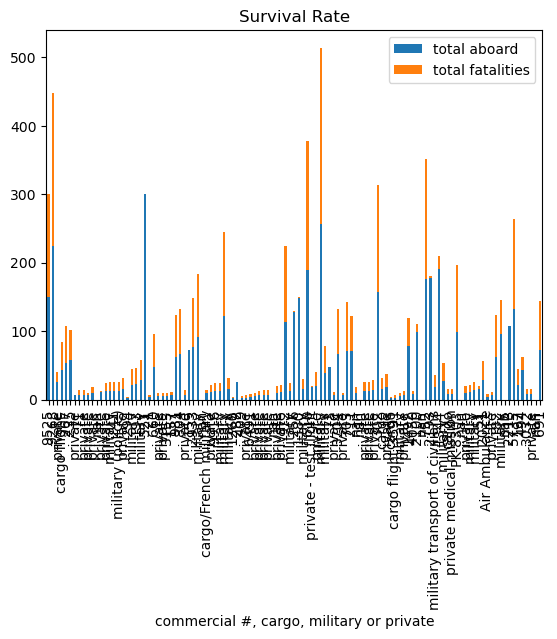

In [32]:
df2.plot.bar(x='commercial #, cargo, military or private', stacked=True, title='Survival Rate')